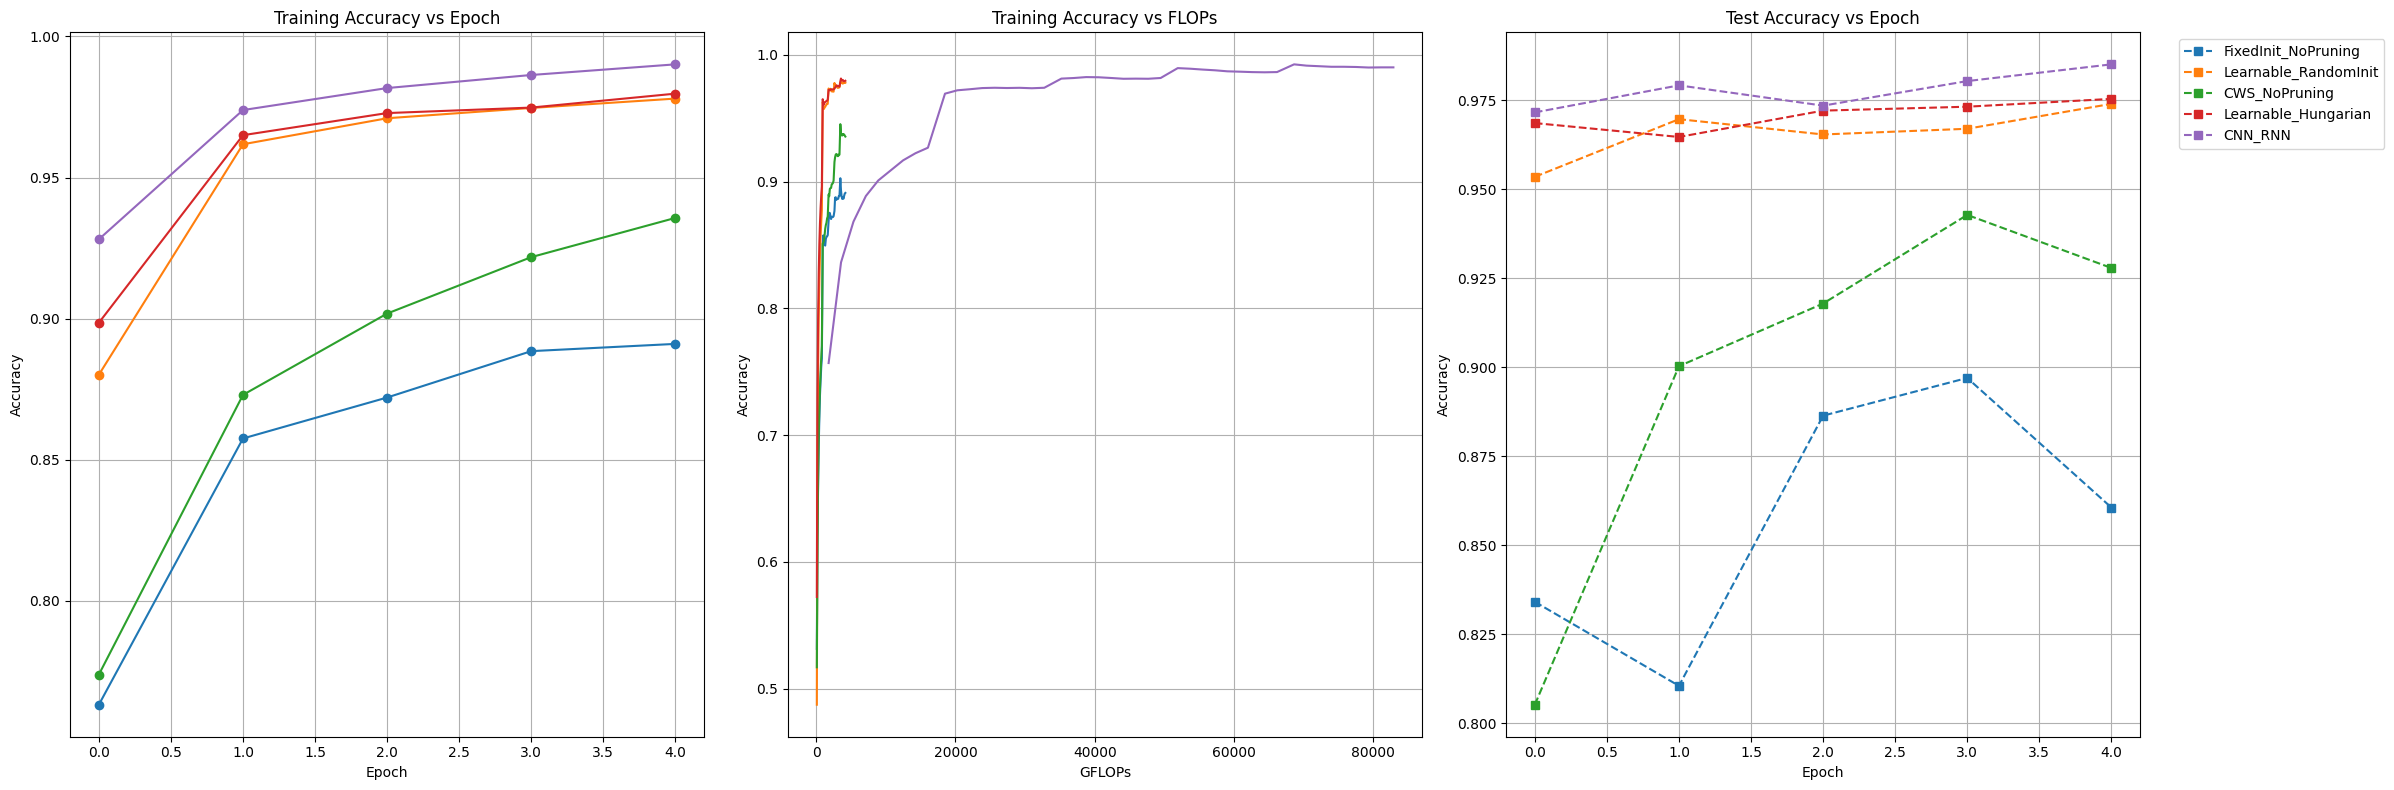

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

experiment_order = [
    "FixedInit_NoPruning", "Learnable_RandomInit",
    "CWS_NoPruning",
    #   "CWS_TrainC_Pruning", "CWS_FixedC_Pruning",
    # "L1_FISTA", 
    "Learnable_Hungarian", "CNN_RNN"
]

def plot_results():
    results = {name: pickle.load(open(f"{name}.pkl", "rb")) for name in experiment_order}
    plt.figure(figsize=(24, 8))
  
    plt.subplot(1, 3, 1)
    for name in experiment_order:
        plt.plot(results[name]['epoch_train_acc'], 'o-', label=name)
    plt.title("Training Accuracy vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)
  
    plt.subplot(1, 3, 2)
    for name in experiment_order:
        flops = [x[0]/1e9 for x in results[name]['flops_acc']]
        acc = [x[1] for x in results[name]['flops_acc']]
        plt.plot(flops, acc, label=name)
    plt.title("Training Accuracy vs FLOPs")
    plt.xlabel("GFLOPs")
    plt.ylabel("Accuracy")
    plt.grid(True)
  
    plt.subplot(1, 3, 3)
    for name in experiment_order:
        plt.plot(results[name]['epoch_test_acc'], 's--', label=name)
    plt.title("Test Accuracy vs Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)
  
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig("all_metrics.png", dpi=300)
    plt.show()

if __name__ == "__main__":
    plot_results()